In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("CSV Files/Social_Network_Ads.csv")

In [5]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
print(df.tail())

      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [7]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: ylabel='Age'>

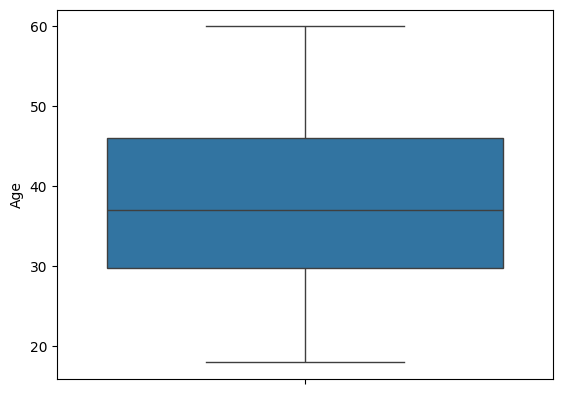

In [9]:
sns.boxplot(df["Age"])

<Axes: ylabel='Purchased'>

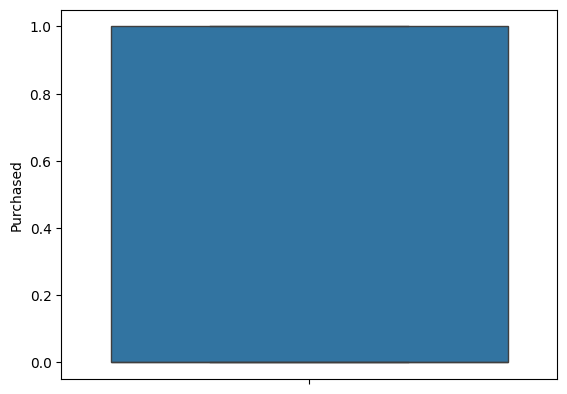

In [10]:
sns.boxplot(df["Purchased"])

<Axes: ylabel='EstimatedSalary'>

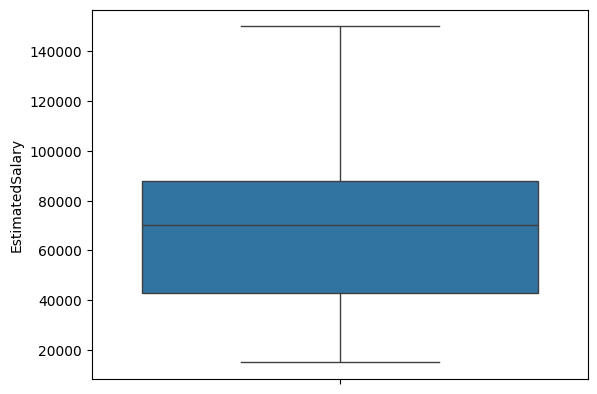

In [11]:
sns.boxplot(df["EstimatedSalary"])

In [12]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

x axis gender, y axis purchased

In [13]:
df[df["Gender"] == "Male"]["Purchased"].count()

np.int64(196)

In [22]:
df[df["Purchased"] == 0]["Purchased"].count()

np.int64(257)

In [21]:
df[df["Purchased"] == 1]["Purchased"].count()

np.int64(143)

<Axes: xlabel='Gender', ylabel='Purchased'>

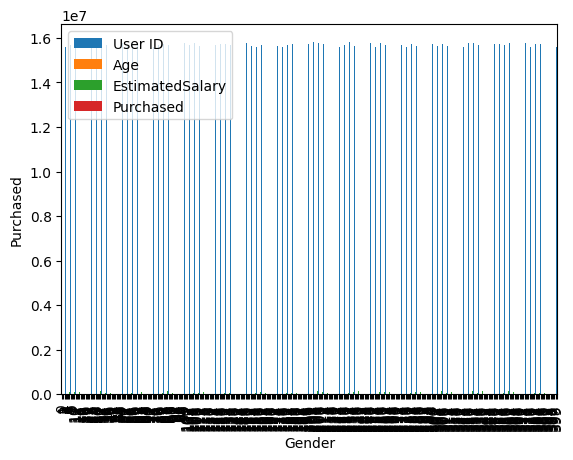

In [16]:
df.plot(xlabel = 'Gender',ylabel = 'Purchased',kind="bar")

<Axes: xlabel='EstimatedSalary'>

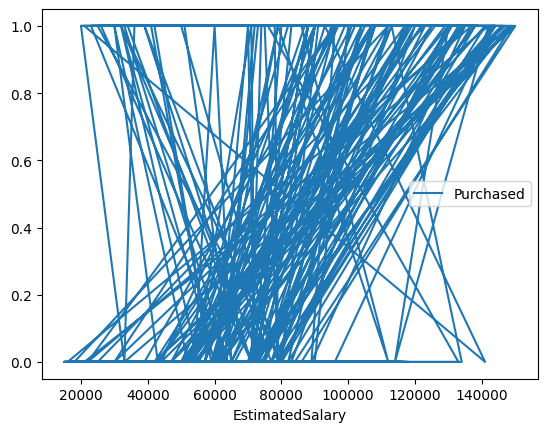

In [17]:
df.plot("EstimatedSalary","Purchased")

In [18]:
x = df.iloc[:,[2,3]].values

In [19]:
y= df.iloc[:,[4]].values

In [23]:
#splitting dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("The Dataset is Splitted Successfully")

The Dataset is Splitted Successfully


In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
#fitting logistic regression to training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
log_reg.fit(x_train,y_train)

print("Logistic Regression Fitted Successfully")

Logistic Regression Fitted Successfully


/home/anshul/Code-Playground/DBL/venv/lib64/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#predict test set results
y_p = log_reg.predict(x_test)
print("Predicted Test Set Results")

Predicted Test Set Results


In [27]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_p)

In [28]:
print(cm)

[[65  3]
 [ 8 24]]


In [29]:
tp = cm[0][0]
print(tp)

65


In [30]:
fp = cm[0][1]
print(fp)

3


In [31]:
fn = cm[1][0]
print(fn)

8


In [32]:
tn = cm[1][1]
print(tn)

24


In [33]:
accuracy = (tp + tn)/(tp +fp + tn + fn)
print(accuracy*100)

89.0


In [34]:
error_r = (fp+fn) / (tp+tn)
print(error_r*100)

12.359550561797752


In [35]:
prec = tp / (tp+fp)
print(prec*100)

95.58823529411765


In [36]:
rec = tp / (tp+fn)
print(rec*100)

89.04109589041096
